## HW_3
### Kübra Yiğiter

### 1. One hot encoding modelin görmediği veriye nasıl uygulanır?

*One Hot Encoding, kategorik değişkenlerin ikili (binary) olarak temsil edilmesi anlamına gelmektedir. Bu işlem ilk önce kategorik değerlerin tamsayı değerleriyle eşlenmesini gerektirir. Daha sonra, her bir tamsayı değeri, 1 ile işaretlenmiş tamsayı indeksi dışında ki tüm değerleri sıfır olan bir ikili vektör olarak temsil edilir. One Hot Encoding, kategorik verilerin temsilinin daha etkileyici ve kolay olmasını sağlar.*

Görmediğimiz veriyle train verimizi aynı şekilde düzenlememiz gerekiyor. Bu yüzden hem train hem de görmediğimiz veriler için tüm dönüşümler ve one hot encoding işlemi train veri seti için yapılan aynı aşamalarda yapılmalıdır. Tahminler yapılmadan önce [0,1] olarak ölçeklendirirken, train veri setindeki aralığın aynısı kullanılmalı. 

pd.get_dummies ,  her veri kümesindeki değerler arasındaki farklılıklar nedeniyle, test veri kümesine kıyasla train veri kümesi için farklı sayıda sütun üretebilir. Bu sırada eğer train veri setinden farklı olarak bilinmeyen bir kategori karşımıza çıkıyorsa, öncesinde 'ignore' ile bilinmeyen kategoriler yoksayılabilir.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')

#örneğin aşağıdaki durumda test içindeki 'D' yok sayılacak
train = pd.DataFrame(['A', 'B', 'A', 'C'])
test = pd.DataFrame(['B', 'A', 'D'])

#ayrıca train ve test'te aynı sayıda sütuna sahip olmama sorunu için 
train.align(test, join='inner', axis=1)

### 2. Labelencoding'de ilgili kolon için ölçeklendirme nasıl yapılır? (Verinin doğru etkisiyle sayısal olarak dönüştürülmesi)

Label encoding veriyi birebir sayısallaştırmaya yarar. Yani kategorik her veriye sayısal bir değer atanmaktadır. Örneğin;
* red
* green
* blue

şekilinde verilen kategorilerki değişkenler alfabetik sırayla 
* 0
* 1
* 2 

değerlerini alacaktır. 
ordinal yapılabilir

In [44]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

In [41]:
df = pd.DataFrame({'pets': ['cat', 'dog', 'cat', 'monkey', 'dog', 'dog'], 
    'owner': ['Champ', 'Ron', 'Brick', 'Champ', 'Veronica', 'Ron'], 
    'location': ['San_Diego', 'New_York', 'New_York', 'San_Diego', 'San_Diego', 
                 'New_York']})
df

,pets,owner,location
0,cat,Champ,San_Diego
1,dog,Ron,New_York
2,cat,Brick,New_York
3,monkey,Champ,San_Diego
4,dog,Veronica,San_Diego
5,dog,Ron,New_York


In [42]:
df["pets_num"] = LabelEncoder().fit_transform(df["pets"])
df

,pets,owner,location,pets_num
0,cat,Champ,San_Diego,0
1,dog,Ron,New_York,1
2,cat,Brick,New_York,0
3,monkey,Champ,San_Diego,2
4,dog,Veronica,San_Diego,1
5,dog,Ron,New_York,1


### 3. Imbalance datasette train test split yaparken neleri göz önünde bulundurmalıyız?

Modelin hiç görülmeyen yeni verilerle nasıl bir sonuç vereceğini kestirebilmek adına train, test ve validation olarak bölünebilir. Test verisi üzerinde yapılan deneme ile modelin nasıl bir sonuç vereceğini görülüp eğitmeye gidelebilir. Bunun için seçilen test verisi oldukça önemlidir çünkü gerçeği yansıtması beklenmekte. 

* En temelde train veri setinin büyüklüğü testten büyük olmalıdır. 
* Train ve test veri seti dağılımında örnekler rastgele dağılmalıdır, elle müdahale edilen verilerde analizin güvenilirliği azalacaktır.  
* Veri setinin train ve test veri seti olarak bölünmesi sırasında dağılıma özen gösterilmelidir. Hem train hem test veri setinde her sınıfa ait örnekler bulunmalıdır. 
* Dengesiz veri kümelerini, train veri seti ve test veri seti olarak ikiye ayrılırken, verilerin dengesizlik oranında, train ve test kümelerine eşit dağılması gerekir. Yani her iki kümede sınıfların oranının aynı olması, modelin performansının istikrarlı olması açısından önemli.

train_test_split() fonksiyonundaki “stratify” parametresiyle, cross-validation score hesaplarken ve hiper parametreleri GridSearchCV veya RandomizedSearchCV ile belirlerken katmanlama durumu dikkate almamız gerekir.

Rastgele örnekleme, bölme için kötü bir seçenek olabilir. "random_state = 42" ile bölündüğünde, train ve test veri kümelerinde değerler değişmeyecektir. 

* Örnek kod


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42 ,stratify = y)

Eğer elimizde dengesiz bir veri kümesi varsa, “class_weight” parametresi yardımıyla azınlık sınıfına atanan ağırlığı dengesizlik oranında arttırarak, algoritmanın azınlık verisini yanlış sınıflandırmasından kaynaklanan hata oranını arttırabiliriz. Dolayısıyla, modeli oluştururken genel hata oranını (overall error rate) azaltmaya çalışan algoritma bu dengesizliği, yani azınlık sınıfı dikkate alacak ve performansı artacaktır.
* Örnek kod

In [ ]:
import sklearn.linear_model as skl_lm
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight("balanced",
                           np.unique(y), y) 

#"class_weights" objesi veri kümesindeki sınıfların dengesizlik oranında ağırlık ataması yapıyor.
classifier = skl_lm.LogisticRegression(class_weight=class_weights)

#veya ağırlıkları kendimiz belirlemek istersek;
classifier = skl_lm.LogisticRegression(class_weight={1:10, 0:1})

### 4. Validation dataseti (modelin görmediği) nasıl oluşturulur ve nasıl predict etmeye hazır hale getirilir?
Validation veri setinde train için yapılan işlemlerin uygulanması gerekmektedir. Encoding işlemleri traine benzer şekilde uygulanmalı ve kolon farklılıkları ortadan kaldırılmalı.

Uygulama esnasında test veri setindeki Target (‘y’ ile işaretli olan satır) değişkeni kaldırılır. Ardından kurulan modele test verisindeki değişkenler (‘x’ input değerleri) eklenerek modelden Target değişken tahmin edilmesi beklenir. Ardından tahmin edilen değişkenler ile daha önce veri setinden çıkarılan Target değişken karşılaştırılıp model performansı ölçülür. 
  

### 5. predict_proba metoduyla oran nasıl hesaplanır ve treshold nasıl değiştirilir?

Oluşturulan karar ağacında olasılıkları öğrenmek için predict_proba kullanılır. 
Imbalance veri setleri için varsayılan threshold düşük performansa neden olabilir. Bu yüzden threshold değiştirme yaklaşımı uygulanabilir.
* Örnek kod

In [ ]:
probabilities = logreg.predict_proba(X_test_dtm)

threshold = 0.4
good = probabilities[:, 1]
predicted_good = good > threshold

### 6. Fraud case'i üzerinde train&test&validation split, encoding, scaling,modelleme çalışmaları Python'da yapılarak, modelin görmediği dataset üzerinde başarılı sonuç alacak bir model örneği yapılmalı.

In [1]:
!pip install imblearn  

In [2]:
!pip install plotly

In [167]:
import pandas as pd
import numpy as np
import datetime as dt
import plotly.express as px
import plotly.graph_objects as go


#for quick viz
import seaborn as sns

#ml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import random

In [207]:
df = pd.read_csv('auto_insurance_csv.csv')

#_c39 sütunu yalnızca null veri içerdiği için çıkarılmıştır. 
df = df.drop(['_c39','Unnamed: 0'], axis = 1)

#umbrella_limit sütununda na değerler "9999" olarak doldurulmuştur.
df['umbrella_limit'] = df.umbrella_limit.fillna("9999")

#police_report_available sütunu na değerler "MISSING" olarak doldurulmuştur.
df['police_report_available'] = df.police_report_available.fillna("MISSING")

#policy_csl sütunu na değerler "MISSING" olarak doldurulmuştur.
df['policy_csl'] = df.policy_csl.fillna("MISSING")

#policy_bind_date ve incident_date için date formatları değiştirilmiştir.
#farkları bulunarak claim_day_of_policy adlı yeni kolon oluşturulmuştur.
df['policy_bind_date'] = pd.to_datetime(df['policy_bind_date'])
df['incident_date'] = pd.to_datetime(df['incident_date'])
df['claim_day_of_policy'] = (df.incident_date -  df.policy_bind_date).dt.days


df['location_check'] = np.nan
df['location_check'] = np.where(df['policy_state'] == df['incident_state'], True, False)

#fraud_reported sütununda Y,N 1,0 ile değiştirilmiştir.
df['fraud_reported'] = df['fraud_reported'].str.replace('Y', '1')
df['fraud_reported'] = df['fraud_reported'].str.replace('N', '0')
df['fraud_reported'] = df['fraud_reported'].astype(int)
df['umbrella_limit'] = df.umbrella_limit.astype(str)
umbrealla = df['umbrella_limit'].unique()

#0.0 ve 9999 dışındakiler "other" kategorisine alınmıştır.
for umb in umbrealla:
  if (umb != '0.0') & (umb != '9999'):
    df['umbrella_limit'] = df['umbrella_limit'].str.replace(umb, 'other')

#fazla fraud görülen chess ve cross-fit dışındaki kategoriler other olarak toplanmıştır. 
hobbies = df['insured_hobbies'].unique()
for hobby in hobbies:
  if (hobby != 'chess') & (hobby != 'cross-fit'):
    df['insured_hobbies'] = df['insured_hobbies'].str.replace(hobby, 'other')

#age için na 9999 ile doldurulmuştur.
#age beşer yaş aralıkta gruplandırılmıştır.
df['age'] = df.age.fillna(9999)
bin_labels = ['15-20', '21-25', '26-30', '31-35', '36-40', '41-45', '46-50', '51-55', '56-60', '61-65','9999']
bins = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 9999]


df['age_group'] = pd.cut(df['age'], bins = bins, labels = bin_labels, include_lowest = True)
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
bin_labels = ['0-50','51-100','101-150','151-200','201-250','251-300','301-350','351-400','401-450','451-500']


#months_as_customer 0-500 arası 50'şer aralıklarlar gruplandırılmıştır.
df['months_as_customer_groups'] = pd.cut(df['months_as_customer'], bins = 10, labels = bin_labels, include_lowest= True)
bins = list(np.linspace(0,2500, 6, dtype = int))
bin_labels = ['very low', 'low', 'medium', 'high', 'very high']

#policy_annual_premium very low'dan very high'a beş kategoride gruplandırılmıştır.
df['policy_annual_premium_groups'] = pd.cut(df['policy_annual_premium'], bins = bins, labels=bin_labels)
bins = list(np.linspace(0,2000, 5, dtype = int))
bin_labels = ['0-500', '501-1000', '1001-1500', '1501-2000']

df['policy_deductable_group'] = pd.cut(df['policy_deductable'], bins = bins, labels = bin_labels)

#gruplanmış yeni sütunları eklenen gruplar çıkarılmıştır.
df = df.drop(['age', 'months_as_customer', 'policy_deductable', 'policy_annual_premium'], axis = 1)


required_columns = ['incident_date','policy_state', 'policy_csl', 'umbrella_limit',
       'insured_zip', 'insured_sex', 'insured_education_level',
       'insured_occupation', 'insured_hobbies', 'insured_relationship',
       'capital-gains', 'capital-loss', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount','auto_make',
       'auto_model', 'auto_year', 'fraud_reported', 'claim_day_of_policy',
       'location_check', 'age_group', 'months_as_customer_groups',
       'policy_annual_premium_groups', 'policy_deductable_group']
df1 = df[required_columns]

<ipython-input-207-7f7c1a50a89a>:35: FutureWarning: The default value of regex will change from True to False in a future version.
  df['umbrella_limit'] = df['umbrella_limit'].str.replace(umb, 'other')


In [208]:
df1.head()

,incident_date,policy_state,policy_csl,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,...,auto_make,auto_model,auto_year,fraud_reported,claim_day_of_policy,location_check,age_group,months_as_customer_groups,policy_annual_premium_groups,policy_deductable_group
0,2015-01-25,OH,250/500,0.0,466132,MALE,MD,craft-repair,other,husband,...,Saab,92x,2004,1,100,False,46-50,301-350,medium,501-1000
1,2015-01-21,IN,250/500,other,468176,MALE,MD,machine-op-inspct,other,other-relative,...,Mercedes,E400,2007,1,3130,False,41-45,201-250,medium,1501-2000
2,2015-02-22,OH,MISSING,other,430632,FEMALE,PhD,sales,other,own-child,...,Dodge,RAM,2007,0,5282,False,26-30,101-150,medium,1501-2000
3,2015-01-10,IL,MISSING,other,608117,FEMALE,PhD,armed-forces,other,unmarried,...,Chevrolet,Tahoe,2014,1,8996,False,41-45,251-300,medium,1501-2000
4,2015-02-17,IL,MISSING,other,610706,MALE,Associate,sales,other,unmarried,...,Accura,RSX,2009,0,256,False,41-45,201-250,high,501-1000


In [209]:
#incident date sayısı
df1.incident_date.count()

1000

In [210]:
#tarihe göre sıralandığında güncel olan %20si validation olarak ayrılmıştır. 
#Validationda en güncel verileri kullanmak hiç görülmeyen verilerle modelin daha doğru sonuç vermesini sağlayacaktır. 
df1_val = df1.sort_values(by='incident_date',ascending=False).head(200)
df2 = df1.sort_values(by='incident_date',ascending=False).tail(800)

In [211]:
#tarihe göre sıralanmıştır.
df1.sort_values(by='incident_date',ascending=False)

,incident_date,policy_state,policy_csl,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,...,auto_make,auto_model,auto_year,fraud_reported,claim_day_of_policy,location_check,age_group,months_as_customer_groups,policy_annual_premium_groups,policy_deductable_group
752,2015-03-01,IL,MISSING,0.0,441533,MALE,PhD,machine-op-inspct,other,unmarried,...,Chevrolet,Tahoe,1997,0,5718,False,9999,401-450,low,0-500
74,2015-03-01,IL,MISSING,0.0,472895,FEMALE,Associate,sales,other,wife,...,BMW,X6,2005,0,3972,False,36-40,201-250,medium,501-1000
914,2015-03-01,OH,MISSING,0.0,436364,FEMALE,JD,transport-moving,cross-fit,own-child,...,Honda,Accord,1998,0,5343,False,36-40,101-150,low,1501-2000
883,2015-03-01,OH,MISSING,0.0,479824,FEMALE,Associate,exec-managerial,other,not-in-family,...,Audi,A5,2005,1,3374,False,31-35,101-150,medium,501-1000
839,2015-03-01,OH,MISSING,0.0,448294,MALE,Associate,protective-serv,other,own-child,...,Dodge,Neon,2011,0,9106,False,41-45,201-250,medium,0-500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
833,2015-01-01,IN,MISSING,0.0,472814,FEMALE,JD,machine-op-inspct,other,other-relative,...,Ford,F150,2011,0,8397,False,26-30,101-150,high,0-500
457,2015-01-01,IL,100/300,0.0,470559,MALE,Masters,transport-moving,other,own-child,...,Volkswagen,Passat,2011,1,759,False,26-30,101-150,high,1501-2000
478,2015-01-01,IL,500/1000,9999,477260,MALE,Masters,armed-forces,chess,unmarried,...,Mercedes,C300,2001,1,6130,False,51-55,401-450,low,1501-2000
41,2015-01-01,IN,250/500,0.0,470577,MALE,Associate,transport-moving,chess,unmarried,...,BMW,X5,2001,1,854,False,9999,101-150,high,0-500


In [212]:
#her iki dataframeden incident_date kaldırılmıştır.
df1_val = df1_val.drop(["incident_date"],axis=1)
df2 = df2.drop(["incident_date"],axis=1)

In [213]:
#her iki dataframeden incident_location kaldırılmıştır.
df1_val = df1_val.drop(["incident_location"],axis=1)
df2 = df2.drop(["incident_location"],axis=1)

In [214]:
#encoding işlemi yapılacak sütunlar belirlenmiştir.
cat_cols = ['age_group', 'months_as_customer_groups', 'policy_annual_premium_groups','location_check','policy_deductable_group']
for col in cat_cols:
  df2[col] = df2[col].astype('object')

columns_to_encode = []
for col in df2.columns:
  if df2[col].dtype == 'object':
    columns_to_encode.append(col)

columns_to_encode

['policy_state',
 'policy_csl',
 'umbrella_limit',
 'insured_sex',
 'insured_education_level',
 'insured_occupation',
 'insured_hobbies',
 'insured_relationship',
 'incident_type',
 'collision_type',
 'incident_severity',
 'authorities_contacted',
 'incident_state',
 'incident_city',
 'property_damage',
 'police_report_available',
 'auto_make',
 'auto_model',
 'location_check',
 'age_group',
 'months_as_customer_groups',
 'policy_annual_premium_groups',
 'policy_deductable_group']

In [215]:
df2.head()

,policy_state,policy_csl,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,capital-gains,...,auto_make,auto_model,auto_year,fraud_reported,claim_day_of_policy,location_check,age_group,months_as_customer_groups,policy_annual_premium_groups,policy_deductable_group
511,OH,MISSING,0.0,446755,FEMALE,JD,sales,other,husband,0,...,Volkswagen,Jetta,2003,0,4427,False,46-50,251-300,medium,501-1000
894,IN,MISSING,0.0,475891,MALE,MD,priv-house-serv,other,not-in-family,0,...,Suburu,Impreza,2000,0,8921,False,31-35,0-50,medium,0-500
125,IN,MISSING,other,603948,MALE,JD,craft-repair,other,unmarried,47200,...,Ford,Escape,2013,0,205,False,36-40,201-250,medium,501-1000
895,IL,MISSING,0.0,462525,MALE,High School,armed-forces,other,own-child,26500,...,Saab,92x,1998,1,1980,False,36-40,151-200,medium,0-500
485,IN,MISSING,0.0,471366,MALE,Associate,adm-clerical,other,husband,0,...,Nissan,Maxima,1995,0,7692,False,26-30,51-100,medium,1501-2000


In [216]:
#encoding ve clm adlı listeye kolonları ekleme
df_e = pd.get_dummies(df2, columns = columns_to_encode)
clm=[]
for _ in df_e.columns:
    clm.append(_)

In [217]:
clm

['insured_zip',
 'capital-gains',
 'capital-loss',
 'incident_hour_of_the_day',
 'number_of_vehicles_involved',
 'bodily_injuries',
 'witnesses',
 'total_claim_amount',
 'auto_year',
 'fraud_reported',
 'claim_day_of_policy',
 'policy_state_IL',
 'policy_state_IN',
 'policy_state_OH',
 'policy_csl_100/300',
 'policy_csl_250/500',
 'policy_csl_500/1000',
 'policy_csl_MISSING',
 'umbrella_limit_0.0',
 'umbrella_limit_9999',
 'umbrella_limit_other',
 'insured_sex_FEMALE',
 'insured_sex_MALE',
 'insured_education_level_Associate',
 'insured_education_level_College',
 'insured_education_level_High School',
 'insured_education_level_JD',
 'insured_education_level_MD',
 'insured_education_level_Masters',
 'insured_education_level_PhD',
 'insured_occupation_adm-clerical',
 'insured_occupation_armed-forces',
 'insured_occupation_craft-repair',
 'insured_occupation_exec-managerial',
 'insured_occupation_farming-fishing',
 'insured_occupation_handlers-cleaners',
 'insured_occupation_machine-op-in

In [218]:
#sayısal ve kategorik kolonlarda ayırma
df3 = df_e.iloc[:,:11]
clm_2= clm[11:]

In [219]:
clm_2

['policy_state_IL',
 'policy_state_IN',
 'policy_state_OH',
 'policy_csl_100/300',
 'policy_csl_250/500',
 'policy_csl_500/1000',
 'policy_csl_MISSING',
 'umbrella_limit_0.0',
 'umbrella_limit_9999',
 'umbrella_limit_other',
 'insured_sex_FEMALE',
 'insured_sex_MALE',
 'insured_education_level_Associate',
 'insured_education_level_College',
 'insured_education_level_High School',
 'insured_education_level_JD',
 'insured_education_level_MD',
 'insured_education_level_Masters',
 'insured_education_level_PhD',
 'insured_occupation_adm-clerical',
 'insured_occupation_armed-forces',
 'insured_occupation_craft-repair',
 'insured_occupation_exec-managerial',
 'insured_occupation_farming-fishing',
 'insured_occupation_handlers-cleaners',
 'insured_occupation_machine-op-inspct',
 'insured_occupation_other-service',
 'insured_occupation_priv-house-serv',
 'insured_occupation_prof-specialty',
 'insured_occupation_protective-serv',
 'insured_occupation_sales',
 'insured_occupation_tech-support',
 

In [220]:
df3

,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,auto_year,fraud_reported,claim_day_of_policy
511,446755,0,-46200,9,1,2,3,6560,2003,0,4427
894,475891,0,0,6,1,1,3,6000,2000,0,8921
125,603948,47200,-69700,12,3,2,3,36300,2013,0,205
895,462525,26500,0,23,3,0,3,55200,1998,1,1980
485,471366,0,-31700,0,1,2,1,48290,1995,0,7692
...,...,...,...,...,...,...,...,...,...,...,...
833,472814,0,0,3,4,0,1,67800,2011,0,8397
457,470559,38000,-41200,5,1,2,1,79800,2011,1,759
478,477260,0,0,6,1,1,2,6300,2001,1,6130
41,470577,0,-24100,1,1,1,1,97080,2001,1,854


In [221]:
#one hot encoding işlemi sırasında ignore işlemi yapılmıştır
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(handle_unknown='ignore')
df4=ohe.fit_transform(df2[columns_to_encode]).toarray()

In [222]:
#bu işlem yapılmadığında null değerlerle karşılaşıldı
df3.reset_index(drop=True, inplace=True)

In [223]:
#birleştirme
df5 = pd.DataFrame(df4, columns=clm_2)
df6 = pd.concat([df3,df5], axis=1)

In [224]:
df6

,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,auto_year,fraud_reported,...,months_as_customer_groups_451-500,months_as_customer_groups_51-100,policy_annual_premium_groups_high,policy_annual_premium_groups_low,policy_annual_premium_groups_medium,policy_annual_premium_groups_very high,policy_annual_premium_groups_very low,policy_deductable_group_0-500,policy_deductable_group_1501-2000,policy_deductable_group_501-1000
0,446755,0,-46200,9,1,2,3,6560,2003,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,475891,0,0,6,1,1,3,6000,2000,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,603948,47200,-69700,12,3,2,3,36300,2013,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,462525,26500,0,23,3,0,3,55200,1998,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,471366,0,-31700,0,1,2,1,48290,1995,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,472814,0,0,3,4,0,1,67800,2011,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
796,470559,38000,-41200,5,1,2,1,79800,2011,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
797,477260,0,0,6,1,1,2,6300,2001,1,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
798,470577,0,-24100,1,1,1,1,97080,2001,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [225]:
#veri x ve y olarak ayrılmıştır
features = []
for col in df6.columns:
  if col != 'fraud_reported':
    features.append(col)

target = 'fraud_reported'

X = df6[features]
y = df6[target]

In [226]:
#scale
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = sc.fit_transform(X)

In [227]:
X

array([[-0.76745023, -0.90867046, -0.68250677, ..., -0.71374643,
        -0.67616189,  1.36652242],
       [-0.36042417, -0.90867046,  0.96145549, ...,  1.4010578 ,
        -0.67616189, -0.73178456],
       [ 1.42851515,  0.79450874, -1.51872134, ..., -0.71374643,
        -0.67616189,  1.36652242],
       ...,
       [-0.34129942, -0.90867046,  0.96145549, ..., -0.71374643,
         1.47893576, -0.73178456],
       [-0.43466004, -0.90867046,  0.10389076, ...,  1.4010578 ,
        -0.67616189, -0.73178456],
       [ 1.55253963,  0.97493027,  0.96145549, ...,  1.4010578 ,
        -0.67616189, -0.73178456]])

In [228]:
#train ve test için %30a %70 olarak data ayrılmıştır
oversample = SMOTE(random_state=9)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,  random_state = 42)
X_over, y_over = oversample.fit_resample(X_train, y_train)
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, test_size = 0.3, random_state = 1)

C:\Users\kubra\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

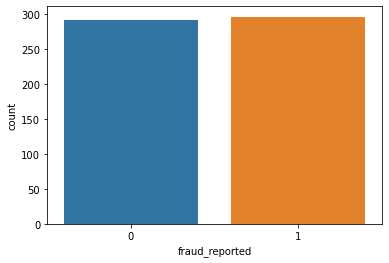

In [229]:
#dağılım kontrolü
chck = pd.DataFrame()
chck['fraud_reported'] = y_train

sns.countplot(chck['fraud_reported'])

93.25396825396825

              precision    recall  f1-score   support

           0       0.94      0.92      0.93       128
           1       0.92      0.94      0.93       124

    accuracy                           0.93       252
   macro avg       0.93      0.93      0.93       252
weighted avg       0.93      0.93      0.93       252



<AxesSubplot:>

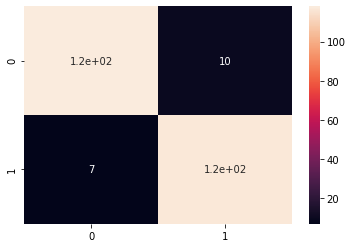

In [230]:
#randomforest modellemesi
rfc = RandomForestClassifier(random_state = 1)
rfc.fit(X_train, y_train)

preds = rfc.predict(X_test)

score = rfc.score(X_test, y_test)
print(score*100)
print()
print(classification_report(y_test, preds))

cm = confusion_matrix(y_test, preds)
sns
sns.heatmap(cm, annot=True)

In [231]:
from sklearn.model_selection import RandomizedSearchCV
# Random forest karar ağacı sayısı
n_estimators = [int(x) for x in np.linspace(start = 300, stop = 1000, num = 3)]
# Dikkate alınması gereken özellik sayısı
max_features = ['auto', 'sqrt']
# Karar ağacında maksimum level sayısı
max_depth = [int(x) for x in np.linspace(5, 30, num = 3)]
max_depth.append(None)
# Bölmek için gerekli minimumu sample sayısı
min_samples_split = [2, 5, 10]
# Leaf node minimum sample sayısı
min_samples_leaf = [1, 2, 4]
# Karar ağacı eğitmek için örnek seçme metodu
bootstrap = [True, False]
# Random grid oluşturma
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

# En iyi hyperparameters için random grid
# Base model
rf = RandomForestClassifier()
# Cross validation kullanarak random search 
# 100 farklı kombinasyonda arama
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

{'n_estimators': [300, 650, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 17, 30, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [5, 17, 30, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [300, 650, 1000]},
                   random_state=42, verbose=2)

In [232]:
#en iyi parametreler
rf_random.best_params_

{'n_estimators': 300,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 5,
 'bootstrap': False}

92.85714285714286

              precision    recall  f1-score   support

           0       0.95      0.91      0.93       128
           1       0.91      0.95      0.93       124

    accuracy                           0.93       252
   macro avg       0.93      0.93      0.93       252
weighted avg       0.93      0.93      0.93       252



<AxesSubplot:>

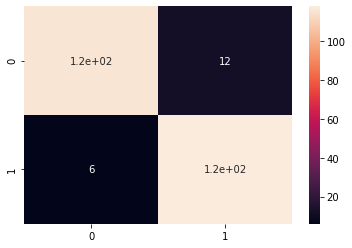

In [246]:
#randomforest modellemesi
rf2 = RandomForestClassifier(n_estimators=300,min_samples_split=5,min_samples_leaf=1,max_features='sqrt'
                            ,max_depth=5,bootstrap='False', random_state = 1)
rf2.fit(X_train, y_train)

preds = rf2.predict(X_test)

score = rf2.score(X_test, y_test)
print(score*100)
print()
print(classification_report(y_test, preds))

cm = confusion_matrix(y_test, preds)
sns
sns.heatmap(cm, annot=True)

In [234]:
#train için yapılan işlemler validation için yapılmıştır

In [247]:
cat_cols = ['age_group', 'months_as_customer_groups', 'policy_annual_premium_groups','location_check','policy_deductable_group']
for col in cat_cols:
  df1_val[col] = df1_val[col].astype('object')

columns_to_encode = []
for col in df1_val.columns:
  if df1_val[col].dtype == 'object':
    columns_to_encode.append(col)

df2_val = pd.DataFrame(ohe.transform(df1_val[columns_to_encode]).toarray(), columns=clm_2)

In [248]:
df2_val.head()

,policy_state_IL,policy_state_IN,policy_state_OH,policy_csl_100/300,policy_csl_250/500,policy_csl_500/1000,policy_csl_MISSING,umbrella_limit_0.0,umbrella_limit_9999,umbrella_limit_other,...,months_as_customer_groups_451-500,months_as_customer_groups_51-100,policy_annual_premium_groups_high,policy_annual_premium_groups_low,policy_annual_premium_groups_medium,policy_annual_premium_groups_very high,policy_annual_premium_groups_very low,policy_deductable_group_0-500,policy_deductable_group_1501-2000,policy_deductable_group_501-1000
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [250]:
clm_3 = clm[:11]
df_val_num = pd.DataFrame(df1_val, columns=clm_3)

In [251]:
df_val_num.reset_index(drop=True, inplace=True)

In [252]:
df3_val = pd.concat([df_val_num,df2_val], axis=1)

In [253]:
df3_val.head()

,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,auto_year,fraud_reported,...,months_as_customer_groups_451-500,months_as_customer_groups_51-100,policy_annual_premium_groups_high,policy_annual_premium_groups_low,policy_annual_premium_groups_medium,policy_annual_premium_groups_very high,policy_annual_premium_groups_very low,policy_deductable_group_0-500,policy_deductable_group_1501-2000,policy_deductable_group_501-1000
0,441533,57100,0,2,4,0,2,38640,1997,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,472895,0,0,18,3,1,0,42930,2005,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,436364,0,-67000,2,4,0,2,72800,1998,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,479824,0,0,18,3,0,3,34160,2005,1,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,448294,0,-48800,4,1,2,2,51600,2011,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [254]:
features = []
for col in df3_val.columns:
  if col != 'fraud_reported':
    features.append(col)

target = 'fraud_reported'

X_val = df3_val[features]
y_val = df3_val[target]

In [255]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_val = sc.fit_transform(X_val)

33.5

              precision    recall  f1-score   support

           0       0.91      0.65      0.76       163
           1       0.32      0.73      0.45        37

    accuracy                           0.67       200
   macro avg       0.62      0.69      0.60       200
weighted avg       0.80      0.67      0.70       200



<AxesSubplot:>

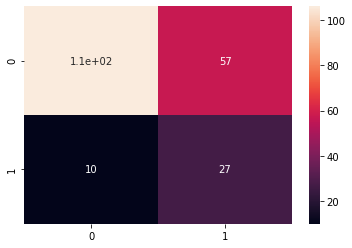

In [299]:
preds = (rfc.predict_proba(X_val)[:,1] >= 0.63).astype(bool)
score = rfc.score(X_val, y_val)
print(score*100)
print()
print(classification_report(y_val, preds))

cm = confusion_matrix(y_val, preds)
sns
sns.heatmap(cm, annot=True)

18.5

              precision    recall  f1-score   support

           0       0.91      0.70      0.79       163
           1       0.35      0.70      0.46        37

    accuracy                           0.70       200
   macro avg       0.63      0.70      0.63       200
weighted avg       0.81      0.70      0.73       200



<AxesSubplot:>

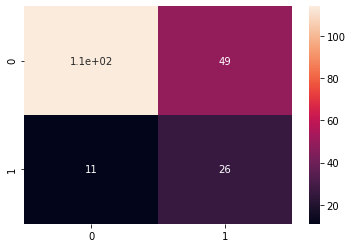

In [292]:
preds = (rf2.predict_proba(X_val)[:,1] >= 0.68).astype(bool)
score = rf2.score(X_val, y_val)

print(score*100)
print()
print(classification_report(y_val, preds))

cm = confusion_matrix(y_val, preds)
sns
sns.heatmap(cm, annot=True)

Score: 0.745
Classification report:               precision    recall  f1-score   support

           0       0.88      0.63      0.74       163
           1       0.28      0.62      0.38        37

    accuracy                           0.63       200
   macro avg       0.58      0.63      0.56       200
weighted avg       0.77      0.63      0.67       200



<AxesSubplot:>

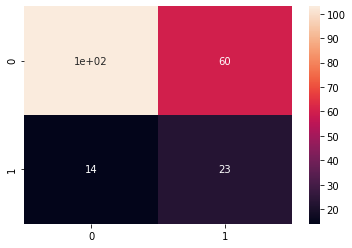

In [291]:
#svc

svc = SVC(kernel='linear', random_state = 1, probability = True)
svc.fit(X_train, y_train)
preds = (svc.predict_proba(X_val)[:,1] >= 0.37).astype(bool)


print('Score:' , svc.score(X_val, y_val))
print('Classification report:', classification_report(y_val, preds))

cm = confusion_matrix(y_val, preds)
sns
sns.heatmap(cm, annot=True)